In [3]:
# Imports necessários:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Opções gerais necessárias:

pd.options.display.float_format = "{:,.2f}".format

In [4]:
RAIS_2019 = pd.read_csv("../data/raw/DATA_RAIS_2009.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)
RAIS_2019.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade',
                            'Raça Cor':'Raça', 'Vl Remun Dezembro Nom':'Remuneração',
                            'Sexo Trabalhador':'Sexo'}, inplace = True)
RAIS_2019.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,AC,212405,63119,6,53,09,"6,361.98",1
1,AC,317205,63119,6,50,09,"4,535.76",1
2,AC,317205,63119,6,50,09,"3,332.64",1
3,AC,212420,63119,6,19,09,544.00,1
4,AC,212405,63119,7,54,09,"6,391.52",1


In [51]:
RAIS_2019.query("Sexo == 1")

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,AC,212405,63119,6,53,09,"6,361.98",1
1,AC,317205,63119,6,50,09,"4,535.76",1
2,AC,317205,63119,6,50,09,"3,332.64",1
3,AC,212420,63119,6,19,09,544.00,1
4,AC,212405,63119,7,54,09,"6,391.52",1
...,...,...,...,...,...,...,...,...
116421,TO,317210,62091,9,50,08,"9,718.68",1
116422,TO,317110,62091,9,51,08,"6,678.22",1
116423,TO,317210,63119,9,37,02,"9,737.84",1
116424,TO,212315,63119,9,38,02,"12,430.84",1


In [5]:
sexo = {1: 'M', 2: 'F'}

In [6]:
media_masculino = RAIS_2019.query("Sexo == 1").Remuneração.mean()
mediana_masculino = RAIS_2019.query("Sexo == 1").Remuneração.median()

print("Média: {}\nMediana: {}".format(media_masculino, mediana_masculino))

Média: 3610.138032401965
Mediana: 2449.25


In [7]:
media_feminino = RAIS_2019.query("Sexo == 2").Remuneração.mean()
mediana_feminino = RAIS_2019.query("Sexo == 2").Remuneração.median()

print("Média: {}\nMediana: {}".format(media_feminino, mediana_feminino))

Média: 3453.393914042252
Mediana: 2357.21


<AxesSubplot:xlabel='Remuneração', ylabel='Sexo'>

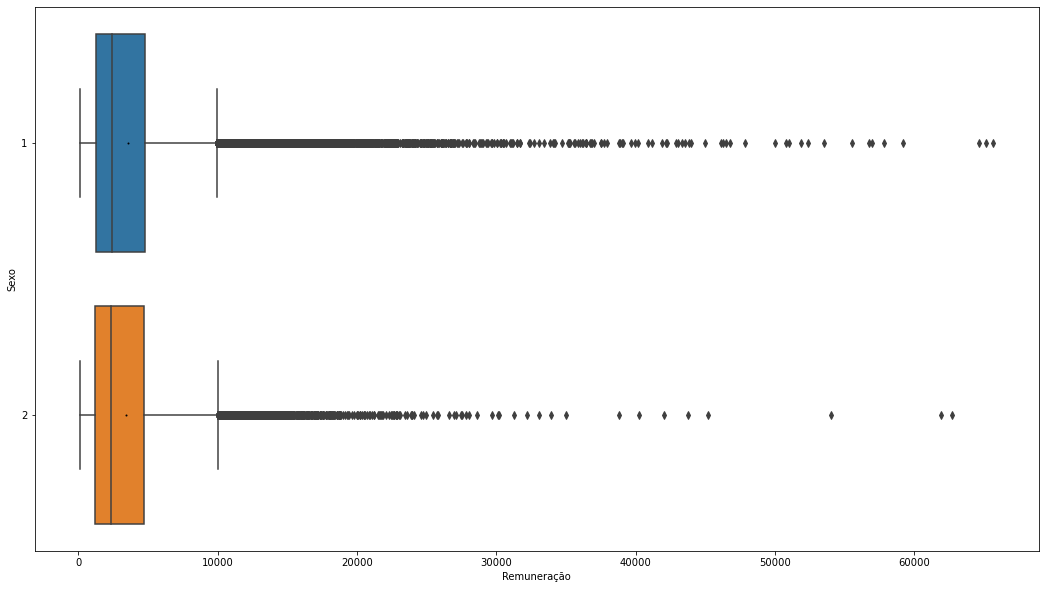

In [8]:
box = sns.boxplot(x = 'Remuneração', y = 'Sexo', data = RAIS_2019, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"1"})
box.figure.set_size_inches(18, 10)
box

In [33]:
from scipy.stats import mannwhitneyu


u, p_valor = mannwhitneyu(RAIS_2019.query("Sexo == 2").Remuneração, RAIS_2019.query("Sexo == 1").Remuneração, alternative = 'less')
print(u)
print('p_valor: {:.15f}'.format(p_valor))

1170131704.0
p_valor: 0.000000000000013


In [30]:
p_valor <= 0.01

True

In [75]:
homens = RAIS_2019.query('Sexo == 1').Remuneração
mulheres = RAIS_2019.query('Sexo == 2').Remuneração

from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

test_H = DescrStatsW(homens)
test_M = DescrStatsW(mulheres)
test_A = test_H.get_compare(test_M)

z, p_valor = test_A.ztest_ind(alternative='larger', value=0)
print('p_valor_teste_A: {:.15f}'.format(p_valor))

print(p_valor <= 0.01)

test_B = CompareMeans(test_H, test_M)
z, p_valor = test_B.ztest_ind(alternative='larger', value=0)
print('p_valor_teste_B: {:.15f}'.format(p_valor))

print(p_valor <= 0.01)

p_valor_teste_A: 0.000000000024402
True
p_valor_teste_B: 0.000000000024402
True


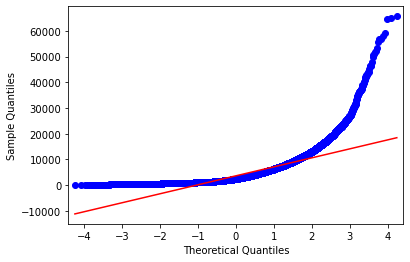

In [86]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(RAIS_2019.query('Sexo == 1').Remuneração, line='s')
pyplot.show()

In [91]:
from scipy.stats import shapiro

stat, p = shapiro(RAIS_2019.query('Sexo == 1').Remuneração)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.735, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\YOHANNGABRIELOLIANIF\anaconda3\envs\ic_fatec39\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [93]:
from scipy.stats import normaltest

# normality test
stat, p = normaltest(RAIS_2019.query('Sexo == 1').Remuneração)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=64653.884, p=0.000
Sample does not look Gaussian (reject H0)


In [96]:
from scipy.stats import anderson

# normality test
result = anderson(RAIS_2019.query('Sexo == 1').Remuneração)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
else:
    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 5571.598
1.000: 1.092, data does not look normal (reject H0)
